In [1]:
import pandas as pd
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.insert(0, './../../preprocessing')

In [4]:
import session as ss

In [5]:
def load_data():
    t = pickle.load( open( "./../../data_set.p", "rb" ) )
    t = ss.define_session(t)
    return t

In [6]:
df = load_data()

3584043


In [7]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [8]:
corpus = []
for uuid, row in df.groupby('UUID'):
    session = []
    for a in row['action_cleaned']:
        session.append(a)
    corpus.append(session)

total_examples = len(corpus)
print('num sessions', total_examples)
print('total num events',len(df)) 

num sessions 200324
total num events 3584043


In [9]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(corpus)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(214 unique tokens: ['click_on_number_details', 'click_on_subscription', 'load_homepage', 'loading subscriptions', 'click_on_send']...)


In [10]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

200324
[(1, 4), (3, 2), (14, 5), (44, 1), (85, 5), (103, 5)]


In [52]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

used: 1766.25s


In [13]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(3, '0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail"'), (12, '0.543*"click_on_name" + 0.216*"click_on_subscription" + 0.094*"load_homepage" + 0.040*"click_on_menu_accounts"')]


In [14]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.398*"click_on_save" + 0.250*"click_on_edit_field" + 0.103*"click_on_number_details" + 0.073*"click_on_MBN_sub" + 0.043*"click_on_new_settings" + 0.033*"click_on_user_type" + 0.031*"click_on_find_person" + 0.028*"load_other_page" + 0.022*"click_on_cancel" + 0.014*"click_on_reference"
1
0.306*"open_invoice_account" + 0.129*"click_on_number_details" + 0.123*"click_on_company" + 0.085*"click_on_menu_subscriptions" + 0.054*"click_on_confirm" + 0.043*"click_on_get_report" + 0.041*"load_homepage" + 0.040*"click_on_new_report" + 0.033*"scroll_on_reports_page" + 0.031*"load_other_page"
2
0.260*"click_on_change_account" + 0.246*"click_on_arrow" + 0.085*"click_on_activate" + 0.081*"click_on_number_details" + 0.075*"activate_new" + 0.052*"click_on_sim_card" + 0.040*"load_homepage" + 0.029*"click_on_add" + 0.026*"loading subscriptions" + 0.025*"click_on_navicon"
3
0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail" + 0.080*"load_h

In [53]:
ldamodel.save('6_topics/topic.model')

In [41]:
from gensim.models import LdaModel
loading = LdaModel.load('10_topics/topic.model')

In [23]:
print(loading.print_topics(num_topics=2, num_words=4))

[(2, '0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference"'), (1, '0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage"')]


In [4]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

/home/aksel/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [5]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('11_topics/topic.model')

In [6]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.240756 -0.170463       1        1  25.951862
6      0.087250  0.075152       2        1  14.127752
0     -0.129424 -0.292916       3        1  12.636413
5     -0.083148  0.186794       4        1  12.282653
8     -0.181278  0.034789       5        1   6.978632
4     -0.050774  0.211976       6        1   6.542019
3      0.247393 -0.171677       7        1   5.826073
7     -0.265792 -0.040027       8        1   5.358582
1      0.188597  0.200012       9        1   5.250559
10     0.129143  0.054953      10        1   2.881267
2     -0.182723 -0.088594      11        1   2.164193, topic_info=     Category           Freq                                 Term  \
term                                                                
5     Default  218981.000000          interact_with_pop_up_window   
6     Default  220061.000000                   scroll_on_homepage   
1     Default  220671.000000                click_on_subscription   
23    Default  144481.000000                       click_on_other   
9     Default  190472.000000                        click_on_APIs   
52    Default   69684.000000                         activate_new   
10    Default  120685.000000                  click_on_agreements   
15    Default  140138.000000     click_on_order_new_cloud_service   
11    Default   51839.000000                       click_on_cloud   
47    Default   62534.000000             click_on_unpaid_invoices   
29    Default   81909.000000              click_on_administrators   
31    Default   78383.000000                    click_on_sim_card   
69    Default   65096.000000                      click_on_abroad   
19    Default   57507.000000                 click_on_bedrift_sub   
4     Default  268810.000000                        click_on_send   
35    Default   38837.000000                         click_on_m2m   
33    Default   39122.000000           click_next_in_subscr_order   
14    Default   51419.000000                        click_on_name   
68    Default   76926.000000             click_on_recommendations   
13    Default  127989.000000                     click_on_confirm   
38    Default   45515.000000              click_on_sub_voice_data   
57    Default   51608.000000               scroll_on_reports_page   
22    Default   69803.000000                     click_on_MBN_sub   
43    Default   55824.000000         click_on_subscription_detail   
26    Default   55220.000000                    account_reference   
54    Default   48017.000000                       click_on_arrow   
45    Default   25983.000000      order_overview_check_change_sub   
32    Default   22371.000000  click_new_subscription_from_scratch   
16    Default   21297.000000          explore_additional_services   
137   Default   20246.000000                   order_invoice_copy   
...       ...            ...                                  ...   
97    Topic11     577.320923            click_on_agreement_detail   
112   Topic11     304.324188                   click_on_reference   
198   Topic11      38.884605      click_on_choose_in_subscr_order   
21    Topic11    4974.029297                send_sms_to_employees   
89    Topic11     426.041168            click_on_sim_card_details   
80    Topic11    1143.253296                        click_on_list   
70    Topic11    2885.944336                         activate_sim   
35    Topic11   13835.494141                         click_on_m2m   
29    Topic11   14776.539062              click_on_administrators   
131   Topic11     137.504272               click_on_pages_details   
28    Topic11     151.507767             click_on_accept_continue   
9     Topic11   13633.369141                        click_on_APIs   
138   Topic11      31.259586                  click_on_add_dealer   
15    Topic11    6445.546387     click_on_order_new_cloud_service   
26    Topic1

In [33]:
pyLDAvis.save_html(data,'vis.html')

In [8]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('./11_topics/topic.model')

CPU times: user 2.03 ms, sys: 74 µs, total: 2.1 ms
Wall time: 1.57 ms


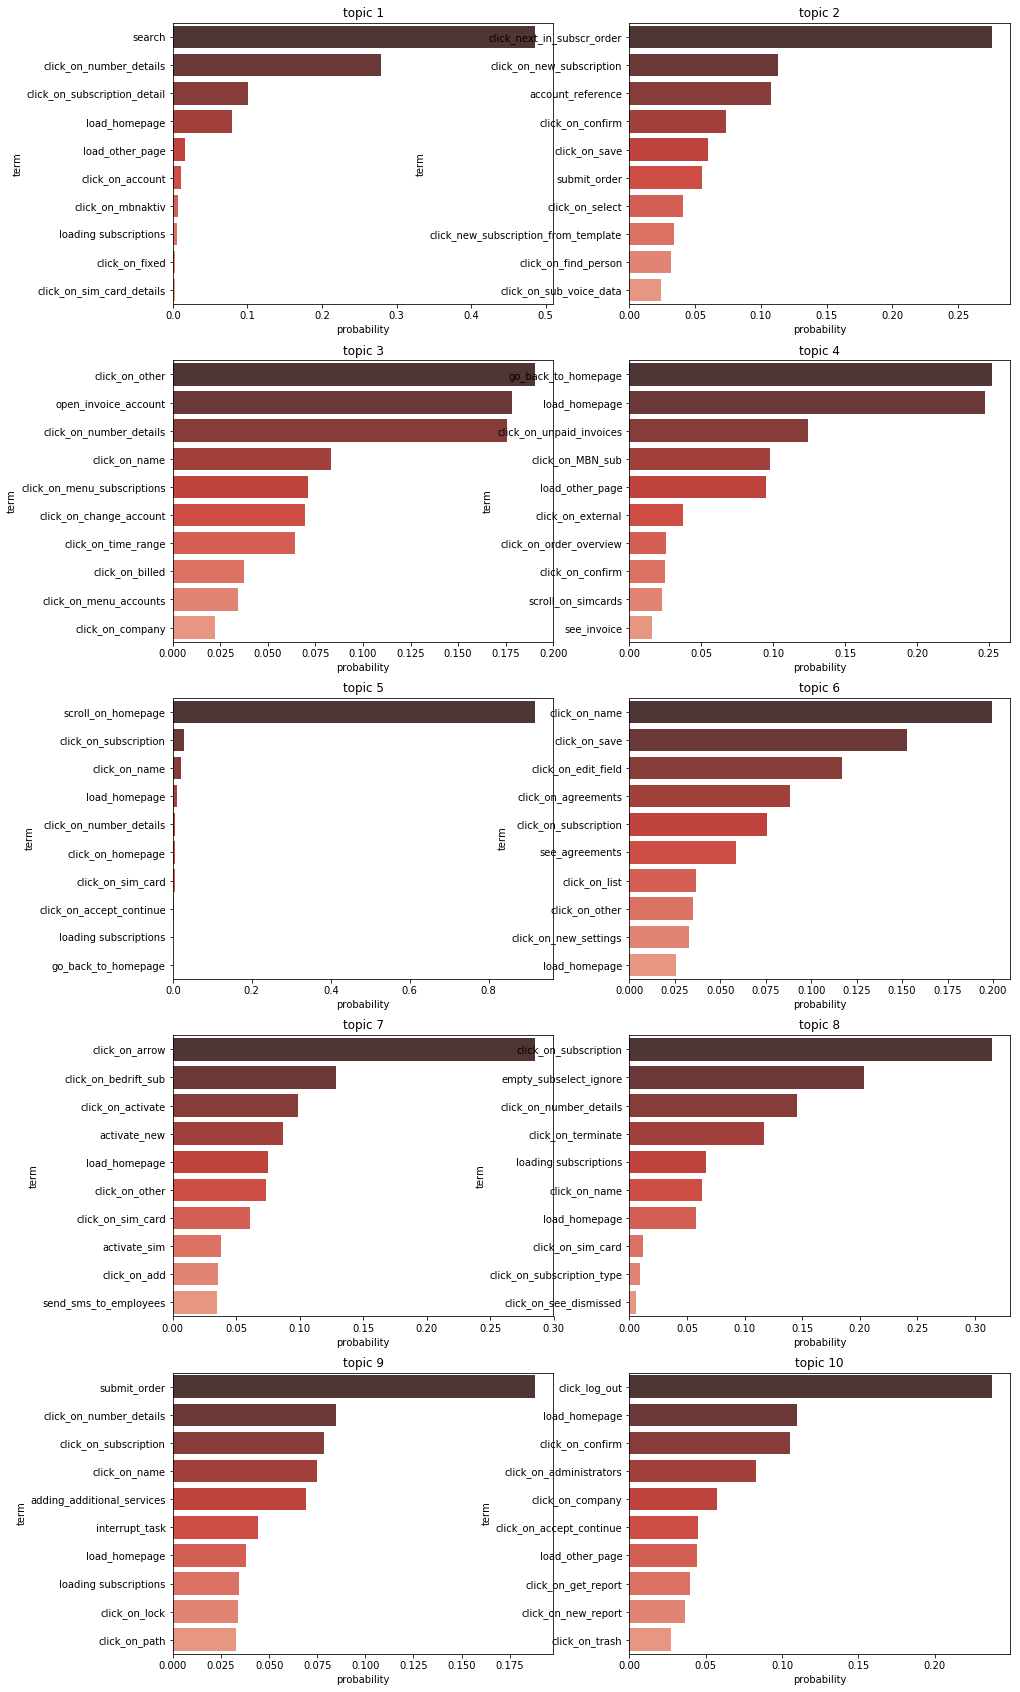

In [9]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()